In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# About Anomaly Detection

#### Take a few minutes and jot down some example applications, specific problems, or domains where detecting anomalies is super valuable and impactful:

In market analysis, identifying anomalous growth patterns could be very profitable. Conversely, failing to identify anomalous declines could prove costly.

Analyzing movement patterns in a crowd could be valuable in a security context. One individual's anomalous movement could indicate mal-intent. 

#### Identify a few example applications, specific problems, or domains where the outliers can skew the data in a negative way and those outliers may be safely avoided for producing a model.

In our zillow property value analysis, outliers represented homes that fall into a separate market segment and would not be useful in our model. 

In customer segmentation designed for targeted marketing, we can avoid the one customer who spends significantly more money than the rest, since the goal is to produce a marketing campaign that appeals to a broad group of customers. 

# Continuous Anomaly Detection

## 1) Exercises - Lemonade dataset

#### 1. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


#### 2. Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [4]:
cols = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']
for col in cols:
    k = 1.5
    q1, q3 = df[col].quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    df[f'{col}_upper_outlier'] = np.where((df[col] > upper_bound), True, False)

In [5]:
df[df.Temperature_upper_outlier]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outlier,Rainfall_upper_outlier,Flyers_upper_outlier,Price_upper_outlier,Sales_upper_outlier
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,True,False,False,False,False


This one should not be kept. A temperature of 212 degrees does not make sense - everyone would be dead. 

In [6]:
df[df.Rainfall_upper_outlier]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outlier,Rainfall_upper_outlier,Flyers_upper_outlier,Price_upper_outlier,Sales_upper_outlier
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,False,True,False,False,False
1,1/2/17,Monday,28.9,1.33,15,0.5,13,False,True,False,False,False
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,False,True,False,False,False
5,1/6/17,Friday,25.3,1.54,23,0.5,11,False,True,False,False,False
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,False,True,False,False,False
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,False,True,False,False,False
11,1/12/17,Thursday,38.2,1.33,16,0.5,14,False,True,False,False,False
12,1/13/17,Friday,37.5,1.33,19,0.5,15,False,True,False,False,False
15,1/16/17,Monday,30.6,1.67,24,0.5,12,False,True,False,False,False
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,False,True,False,False,False


<AxesSubplot:>

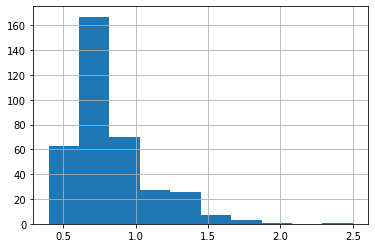

In [7]:
df.Rainfall.hist()

These values might fall outside of our predetermined range. However, it should be considered that outlier-level volumes of precipitation occur with a fair amount of regularity, and so it should be expected that this level of rain will occur again at some point. These should not be dropped. that being said, volume of 2.5 (on 12/31) might be far enough outside of the norm to safely ignore in most cases. 

In [8]:
df[df.Flyers_upper_outlier]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outlier,Rainfall_upper_outlier,Flyers_upper_outlier,Price_upper_outlier,Sales_upper_outlier
166,6/16/17,Friday,99.3,0.47,77,0.5,41,False,False,True,False,False
194,7/14/17,Friday,92.0,0.50,80,0.5,40,False,False,True,False,False


<AxesSubplot:>

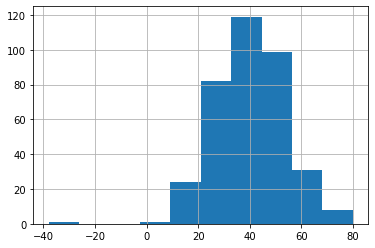

In [9]:
df.Flyers.hist()

I see no reason to ignore outliers for number of flyers. These represent days in which the lemonade sellers put in extra effort/expense putting out extra flyers. Any sensible analysis would want to account for that to see whether it had an effect on sales. 

In [10]:
df[df.Price_upper_outlier]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outlier,Rainfall_upper_outlier,Flyers_upper_outlier,Price_upper_outlier,Sales_upper_outlier


In [11]:
df[df.Sales_upper_outlier]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outlier,Rainfall_upper_outlier,Flyers_upper_outlier,Price_upper_outlier,Sales_upper_outlier
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,False,False,False,False,True
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,False,False,False,False,True
183,7/3/17,Monday,81.5,0.54,68,0.5,235,False,False,False,False,True
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,False,False,False,False,True


<AxesSubplot:>

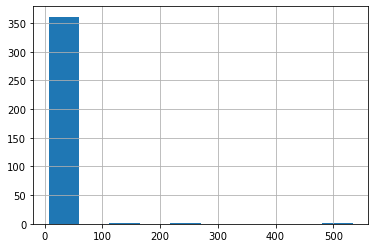

In [12]:
df.Sales.hist()

On the one hand, these sales volumes (ranging from 143 - 534) appear to be well outside the norm based on this simple histogram. On the other hand, any sensible analysis would want to identify what causes an abnormally high volume of sales, as these outliers could prove very profitable. Further, if we examine the dates of these sales volumes, there is a probably explanation for this: They ocurred on Fourth of July weekend, which I can only assume is notorious for high lemonade sales, and probably saw the ocurrence of some sort of festival. These should not be thrown out.

#### 3. Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [13]:
cols = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']
for col in cols:
    k = 3
    q1, q3 = df[col].quantile([.25, .75])
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    df[f'{col}_lower_outlier'] = np.where((df[col] < lower_bound), True, False)

In [14]:
df.mean()

Temperature                  61.224658
Rainfall                      0.825973
Flyers                       40.104110
Price                         0.500000
Sales                        27.865753
Temperature_upper_outlier     0.002740
Rainfall_upper_outlier        0.076712
Flyers_upper_outlier          0.005479
Price_upper_outlier           0.000000
Sales_upper_outlier           0.010959
Temperature_lower_outlier     0.000000
Rainfall_lower_outlier        0.000000
Flyers_lower_outlier          0.002740
Price_lower_outlier           0.000000
Sales_lower_outlier           0.000000
dtype: float64

In [15]:
df[df.Flyers_lower_outlier]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outlier,Rainfall_upper_outlier,Flyers_upper_outlier,Price_upper_outlier,Sales_upper_outlier,Temperature_lower_outlier,Rainfall_lower_outlier,Flyers_lower_outlier,Price_lower_outlier,Sales_lower_outlier
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,False,False,False,False,False,False,False,True,False,False


It can be assumed this outlier is a typo and could be ignored. More, likely, it should have been a postive value of 38.

#### Identify if any columns in lemonade.csv are normally distributed. 

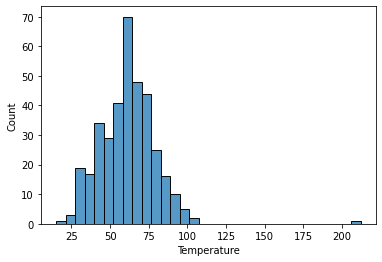

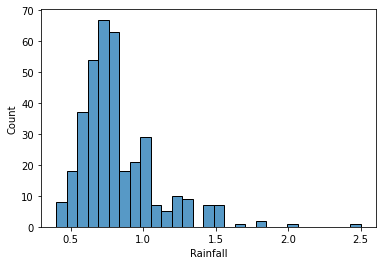

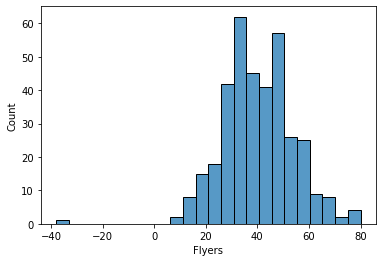

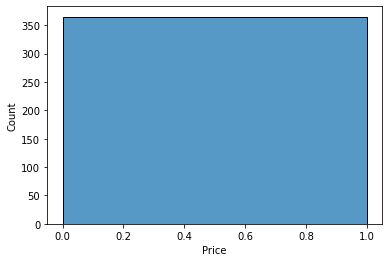

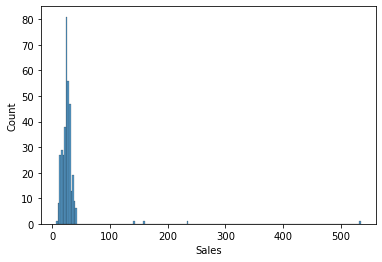

In [16]:
for col in cols:
    sns.histplot(df[col])
    plt.show()

#### For normally distributed columns: Use a 2 sigma decision rule to isolate the outliers. Do these make sense? Should certain outliers be kept or removed?

roughly normal (but with outliers) = temp, rainfall, flyers, sales

In [18]:
cols = ['Temperature', 'Rainfall', 'Flyers', 'Sales']
n_stddevs = 2
for col in cols:
    lower_bound = df[col].mean() - (n_stddevs * df[col].std())
    upper_bound = df[col].mean() + (n_stddevs * df[col].std())
    df[f'{col}_{n_stddevs}sigma_outlier'] = (df[col] < lower_bound) | (df[col] > upper_bound)

In [19]:
df.mean()

Temperature                   61.224658
Rainfall                       0.825973
Flyers                        40.104110
Price                          0.500000
Sales                         27.865753
Temperature_upper_outlier      0.002740
Rainfall_upper_outlier         0.076712
Flyers_upper_outlier           0.005479
Price_upper_outlier            0.000000
Sales_upper_outlier            0.010959
Temperature_lower_outlier      0.000000
Rainfall_lower_outlier         0.000000
Flyers_lower_outlier           0.002740
Price_lower_outlier            0.000000
Sales_lower_outlier            0.000000
Temperature_2sigma_outlier     0.027397
Rainfall_2sigma_outlier        0.052055
Flyers_2sigma_outlier          0.035616
Sales_2sigma_outlier           0.010959
dtype: float64

In [20]:
df[df.Temperature_2sigma_outlier]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outlier,Rainfall_upper_outlier,Flyers_upper_outlier,...,Sales_upper_outlier,Temperature_lower_outlier,Rainfall_lower_outlier,Flyers_lower_outlier,Price_lower_outlier,Sales_lower_outlier,Temperature_2sigma_outlier,Rainfall_2sigma_outlier,Flyers_2sigma_outlier,Sales_2sigma_outlier
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,True,False,False,...,False,False,False,False,False,False,True,False,False,False
166,6/16/17,Friday,99.3,0.47,77,0.5,41,False,False,True,...,False,False,False,False,False,False,True,False,True,False
176,6/26/17,Monday,102.6,0.47,60,0.5,42,False,False,False,...,False,False,False,False,False,False,True,False,False,False
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,False,False,False,...,True,False,False,False,False,False,True,False,False,True
190,7/10/17,Monday,98.0,0.49,66,0.5,40,False,False,False,...,False,False,False,False,False,False,True,False,False,False
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,False,False,False,...,False,False,False,False,False,False,True,False,True,False
202,7/22/17,Saturday,99.6,0.47,49,0.5,42,False,False,False,...,False,False,False,False,False,False,True,False,False,False
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,False,False,False,...,False,False,False,False,False,False,True,False,True,False
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,False,True,False,...,False,False,False,False,False,False,True,True,True,False
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,False,True,False,...,False,False,False,False,False,False,True,True,True,False


<AxesSubplot:>

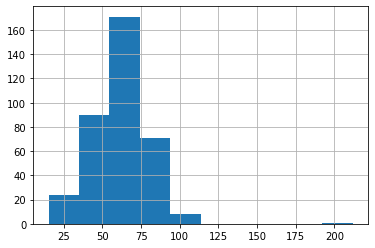

In [21]:
df.Temperature.hist()

A Temperature of 212 does not make sense and should be removed. The remaining temperatures should be kept. Outlier-level weather patterns occur with some level of regularity and most cannot be considered truly anomalous. it should be expected that temperatures this extreme will occur from time to time, and we would want to analyze what the effects of those extremes. 

In [22]:
df[df.Rainfall_2sigma_outlier]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outlier,Rainfall_upper_outlier,Flyers_upper_outlier,...,Sales_upper_outlier,Temperature_lower_outlier,Rainfall_lower_outlier,Flyers_lower_outlier,Price_lower_outlier,Sales_lower_outlier,Temperature_2sigma_outlier,Rainfall_2sigma_outlier,Flyers_2sigma_outlier,Sales_2sigma_outlier
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,False,True,False,...,False,False,False,False,False,False,False,True,False,False
5,1/6/17,Friday,25.3,1.54,23,0.5,11,False,True,False,...,False,False,False,False,False,False,False,True,False,False
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,False,True,False,...,False,False,False,False,False,False,False,True,False,False
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,False,True,False,...,False,False,False,False,False,False,False,True,False,False
15,1/16/17,Monday,30.6,1.67,24,0.5,12,False,True,False,...,False,False,False,False,False,False,False,True,False,False
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,False,True,False,...,False,False,False,False,False,False,False,True,False,False
19,1/20/17,Friday,31.6,1.43,20,0.5,12,False,True,False,...,False,False,False,False,False,False,False,True,False,False
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12,False,True,False,...,False,False,False,False,False,False,False,True,False,False
337,12/4/17,Monday,34.9,1.54,16,0.5,13,False,True,False,...,False,False,False,False,False,False,False,True,False,False
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,False,True,False,...,False,False,False,False,False,False,True,True,True,False


Again, the most extreme values could potentially be removed with little consequence, but the remaining values should be kept, since outlier level weather data is actually rather common. In this case, it occurs during a mostly continuous two month season (AKA a rainy season).

In [23]:
df[df.Flyers_2sigma_outlier]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outlier,Rainfall_upper_outlier,Flyers_upper_outlier,...,Sales_upper_outlier,Temperature_lower_outlier,Rainfall_lower_outlier,Flyers_lower_outlier,Price_lower_outlier,Sales_lower_outlier,Temperature_2sigma_outlier,Rainfall_2sigma_outlier,Flyers_2sigma_outlier,Sales_2sigma_outlier
166,6/16/17,Friday,99.3,0.47,77,0.5,41,False,False,True,...,False,False,False,False,False,False,True,False,True,False
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37,False,False,False,...,False,False,False,False,False,False,False,False,True,False
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41,False,False,False,...,False,False,False,False,False,False,False,False,True,False
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,False,False,False,...,True,False,False,False,False,False,False,False,True,True
183,7/3/17,Monday,81.5,0.54,68,0.5,235,False,False,False,...,True,False,False,False,False,False,False,False,True,True
194,7/14/17,Friday,92.0,0.50,80,0.5,40,False,False,True,...,False,False,False,False,False,False,False,False,True,False
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,False,False,False,...,False,False,False,False,False,False,True,False,True,False
203,7/23/17,Sunday,89.1,0.51,72,0.5,37,False,False,False,...,False,False,False,False,False,False,False,False,True,False
204,7/24/17,Monday,83.5,0.57,69,0.5,35,False,False,False,...,False,False,False,False,False,False,False,False,True,False
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,False,False,False,...,False,False,False,False,False,False,True,False,True,False


Again, we should remove (or change to a positive value) the negative value. The remaining values should be kept in order to analyze the effects of an exceptionally large or small amount of flyers being distributed.

In [24]:
df[df.Sales_2sigma_outlier]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outlier,Rainfall_upper_outlier,Flyers_upper_outlier,...,Sales_upper_outlier,Temperature_lower_outlier,Rainfall_lower_outlier,Flyers_lower_outlier,Price_lower_outlier,Sales_lower_outlier,Temperature_2sigma_outlier,Rainfall_2sigma_outlier,Flyers_2sigma_outlier,Sales_2sigma_outlier
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,False,False,False,...,True,False,False,False,False,False,True,False,False,True
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,False,False,False,...,True,False,False,False,False,False,False,False,True,True
183,7/3/17,Monday,81.5,0.54,68,0.5,235,False,False,False,...,True,False,False,False,False,False,False,False,True,True
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,False,False,False,...,True,False,False,False,False,False,False,False,False,True


(see comments regarding these same sales outliers in the IQR section above)

#### Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [25]:
cols = ['Temperature', 'Rainfall', 'Flyers', 'Sales']
n_stddevs = 3
for col in cols:
    lower_bound = df[col].mean() - (n_stddevs * df[col].std())
    upper_bound = df[col].mean() + (n_stddevs * df[col].std())
    df[f'{col}_{n_stddevs}sigma_outlier'] = (df[col] < lower_bound) | (df[col] > upper_bound)

In [27]:
df[df.Temperature_3sigma_outlier]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outlier,Rainfall_upper_outlier,Flyers_upper_outlier,...,Price_lower_outlier,Sales_lower_outlier,Temperature_2sigma_outlier,Rainfall_2sigma_outlier,Flyers_2sigma_outlier,Sales_2sigma_outlier,Temperature_3sigma_outlier,Rainfall_3sigma_outlier,Flyers_3sigma_outlier,Sales_3sigma_outlier
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,True,False,False,...,False,False,True,False,False,False,True,False,False,False


In [28]:
df[df.Sales_3sigma_outlier]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outlier,Rainfall_upper_outlier,Flyers_upper_outlier,...,Price_lower_outlier,Sales_lower_outlier,Temperature_2sigma_outlier,Rainfall_2sigma_outlier,Flyers_2sigma_outlier,Sales_2sigma_outlier,Temperature_3sigma_outlier,Rainfall_3sigma_outlier,Flyers_3sigma_outlier,Sales_3sigma_outlier
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,False,False,False,...,False,False,True,False,False,True,False,False,False,True
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,False,False,False,...,False,False,False,False,True,True,False,False,False,True
183,7/3/17,Monday,81.5,0.54,68,0.5,235,False,False,False,...,False,False,False,False,True,True,False,False,False,True
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,False,False,False,...,False,False,False,False,False,True,False,False,False,True
